In [1]:
import numpy as np
import pandas as pd

In [2]:
# Please, to run the experiments donwload the following dataset and put them in the /Datasets folder:
# 	- household_power_consumption.txt - 
#       https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
#       (extract the .txt file)
    

filename = "Datasets/household_power_consumption.txt"
df = pd.read_csv(filename, sep=';', header=0, usecols=[2,3,6,7,8,4,5])
df = df.dropna()

# print(list(df.columns.values))

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

df = df.dropna()

print(df.shape)
print(df.dtypes)

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2049280, 7)
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [3]:
x = df[['Global_active_power','Global_reactive_power','Global_intensity']]
x = x.to_numpy()
y = df['Voltage']
y = y.to_numpy()

In [4]:
import CaGD_ls

x = np.ascontiguousarray(x)
print(x.shape)
x = CaGD_ls.tens_pow(x,5) 

print(x.shape)

(2049280, 3)
(2049280, 363)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [6]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=0.999, svd_solver='full')
pca.fit(x_scaled)
x_scaled_pca = pca.transform(x_scaled)
print(np.shape(x_scaled_pca))
pca.explained_variance_ratio_.sum()

(2049280, 7)


0.9999912424914186

In [7]:
x_scaled_pca = CaGD_ls.add_bias(x_scaled_pca)
print(np.shape(x_scaled_pca))

(2049280, 8)


/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.239985888491173

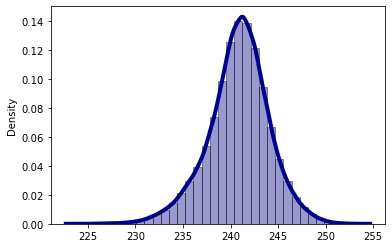

In [8]:
import seaborn as sns
sns.distplot(y, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
y.std()

In [9]:
lr = 1e-3  
block_dim = 2 
loss_accepted = 1e-5
max_iter = 5e1
lambda_LASSO = 1e-2
batch_size = 256

n = np.shape(x_scaled_pca)[1]
print("number of parameters ", n)
print("number of points ", x_scaled_pca.shape[0])
theta_0 = np.random.uniform(-1/n**0.5,1/n**0.5,n)

number of parameters  8
number of points  2049280


In [10]:
loss_momBCD_GS,iteration_momBCD_GS,theta_momBCD_GS,t_momBCD_GS = CaGD_ls.mom_BCD_GS_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  58144.87847628718  | time =  0.011284497000019655
iteration =  1  | loss =  58144.87774642416  | time =  0.1390587620000474
PID parallel:  23146  | process number  0
iteration =  3  | loss =  57472.37486853506  | time =  0.5261386619999939
PID parallel:  23148  | process number  0
iteration =  5  | loss =  56065.30278296926  | time =  0.9791096339999967
PID parallel:  23150  | process number  0
iteration =  7  | loss =  54099.06111357234  | time =  1.425262454999995
PID parallel:  23152  | process number  0
iteration =  9  | loss =  51725.24570498805  | time =  1.8809904010000196
PID parallel:  23154  | process number  0
iteration =  11  | loss =  49073.09136418616  | time =  2.3215866410000103
PID parallel:  23156  | process number  0
iteration =  13  | loss =  46249.73972011763  | time =  2.778176701999996
PID parallel:  23158  | process number  0
iteration =  15  | loss =  43341.532338486584  | time =  3.2216395330000296
PID parallel:  23160  | process numb

In [11]:
loss_randomBCD_GS,iteration_randomBCD_GS,theta_randomBCD_GS,t_randomBCD_GS = CaGD_ls.mom_BCD_random_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  58144.87847628718  | time =  0.011369242000000668
iteration =  0  | loss =  58144.87847628718  | time =  0.012221323000005668
PID parallel:  23197  | process number  0PID parallel: 
 23198 PID parallel:  | process number   231991 
 | process number  2
PID parallel:  PID parallel: 23200 PID parallel:  23201   | process number 23202 | process number     | process number 43 

5
iteration =  6  | loss =  57912.3149772826  | time =  0.4962225429999876
PID parallel:  23204  | process number  0
PID parallel: PID parallel:   2320523206   | process number  | process number   PID parallel: 12 

23207  | process number  PID parallel: 3 
23208PID parallel:   | process number   232094  | process number 
 5
iteration =  12  | loss =  57911.981625945235  | time =  0.9836726899999917
PID parallel: PID parallel:   2321123212PID parallel:    PID parallel:  | process number  | process number 23214    2321310 
 | process number 
 | process number  PID parallel: PID parallel: 3   

In [12]:
loss_BCD_GS,iteration_BCD_GS,theta_BCD_GS,t_BCD_GS = CaGD_ls.BCD_GS_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  58144.87847628718  | time =  0.010421962000009444
iteration =  1  | loss =  58144.87774642416  | time =  0.13056073300003845
PID parallel:  23261  | process number  0
iteration =  3  | loss =  57680.77229805938  | time =  0.5840548370000533
PID parallel:  23263  | process number  0
iteration =  5  | loss =  57220.605724432935  | time =  1.0282373990000337
PID parallel:  23265  | process number  0
iteration =  7  | loss =  56764.21245363657  | time =  1.482909545000041
PID parallel:  23267  | process number  0
iteration =  9  | loss =  56311.50602777107  | time =  1.9287534420000156
PID parallel:  23269  | process number  0
iteration =  11  | loss =  55862.43153901507  | time =  2.382100863000005
PID parallel:  23271  | process number  0
iteration =  13  | loss =  55416.940401066226  | time =  2.8271896260000062
PID parallel:  23273  | process number  0
iteration =  15  | loss =  54975.004373082265  | time =  3.279492345000051
PID parallel:  23275  | process nu

In [13]:
loss_momCA_GS,iteration_momCA_GS,theta_momCA_GS,t_momCA_GS = CaGD_ls.mom_CA_BCD_GS_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  58144.87847628718  | time =  0.011972288999970715
iteration =  2  | loss =  57912.30292514359  | time =  0.3474811620000082
PID parallel:  23312  | process number  0  | iterations CA =  100
iteration =  4  | loss =  533.4899566381672  | time =  1.1885289829999692
PID parallel:  23314  | process number  0  | iterations CA =  12
iteration =  6  | loss =  274.7746849362493  | time =  2.097054233999984
PID parallel:  23316  | process number  0  | iterations CA =  30
iteration =  8  | loss =  62.71825935722531  | time =  2.997981781999954
PID parallel:  23318  | process number  0  | iterations CA =  55
iteration =  10  | loss =  13.867046953262282  | time =  3.897866070999953
PID parallel:  23320  | process number  0  | iterations CA =  12
iteration =  12  | loss =  12.55808244887991  | time =  4.804955430999996
PID parallel:  23322  | process number  0  | iterations CA =  25
iteration =  14  | loss =  11.569635146595498  | time =  5.711986336999985
PID parallel:  

In [14]:
loss_momCA_random,iteration_momCA_random,theta_momCA_random,t_momCA_random = CaGD_ls.mom_CA_BCD_random_ls(
                            x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.5)

iteration =  0  | loss =  58144.87847628718  | time =  0.01074277599997231
iteration =  2  | loss =  57912.56711773291  | time =  0.2381769570000074
PID parallel:  23383 PID parallel:  | process number   123382   | process number  | iterations CA =   08 
 | iterations CA =  35
iteration =  4  | loss =  16351.437654124378  | time =  0.8754094579999787
PID parallel:  PID parallel: 23385  23386 | process number    | process number 0  1 | iterations CA =   56 | iterations CA = 
 1
iteration =  6  | loss =  15578.323692172928  | time =  1.5133586860000037
PID parallel:  23388  | process number PID parallel:   023389   | iterations CA =  | process number   11
  | iterations CA =  100
iteration =  8  | loss =  89.4403103356863  | time =  2.1874911709999765
PID parallel: PID parallel:   2339123392   | process number  | process number  0  1  | iterations CA =  | iterations CA =  6 
1
iteration =  10  | loss =  65.46846732141931  | time =  2.871225783
PID parallel: PID parallel:   2339423395   |

In [15]:
loss_CABCD_stand_GS,iteration_CABCD_stand_GS,theta_CABCD_stand_GS,t_CABCD_stand_GS = CaGD_ls.CA_BCD_GS_ls(
                             x_scaled_pca,y,theta_0,lambda_LASSO,lr,loss_accepted,max_iter,2,0.75)

iteration =  0  | loss =  58144.87847628718  | time =  0.011560392000035336
iteration =  2  | loss =  57912.30292514359  | time =  0.2855161100000032
PID parallel:  23459  | process number  0  | iterations CA =  100
iteration =  4  | loss =  38652.95560102794  | time =  1.0543608120000272
PID parallel:  23461  | process number  0  | iterations CA =  100
iteration =  6  | loss =  25799.250609116145  | time =  1.8443362589999879
PID parallel:  23463  | process number  0  | iterations CA =  100
iteration =  8  | loss =  17221.362015049075  | time =  2.6354404900000077
PID parallel:  23465  | process number  0  | iterations CA =  100
iteration =  10  | loss =  11496.798478940667  | time =  3.4227017119999914
PID parallel:  23467  | process number  0  | iterations CA =  100
iteration =  12  | loss =  7676.356724479476  | time =  4.213107575000038
PID parallel:  23469  | process number  0  | iterations CA =  100
iteration =  14  | loss =  5126.7811668709055  | time =  4.994402783999988
PID p

In [16]:
loss_ADAM,iteration_ADAM,theta_ADAM,t_ADAM = CaGD_ls.ADAM_ls(x_scaled_pca,y,theta_0,lambda_LASSO,batch_size,lr,loss_accepted,max_iter)

iteration =  0  | loss =  58144.87847628718  | time =  0.011570215000006101
iteration =  1  | loss =  54442.56949031716  | time =  0.5547722489999956
iteration =  2  | loss =  50790.24647826186  | time =  1.0889156719999846
iteration =  3  | loss =  47265.49322053992  | time =  1.6192129909999835
iteration =  4  | loss =  43868.369013904805  | time =  2.163480791999973
iteration =  5  | loss =  40598.81515309088  | time =  2.6978419749999603
iteration =  6  | loss =  37456.85005322459  | time =  3.219395338999959
iteration =  7  | loss =  34442.38978263563  | time =  3.7409629599999903
iteration =  8  | loss =  31555.47078871887  | time =  4.2664949320000005
iteration =  9  | loss =  28796.04274833854  | time =  4.811980285000004
iteration =  10  | loss =  26164.09685621553  | time =  5.343684682000003
iteration =  11  | loss =  23659.613409806247  | time =  5.865241228000002
iteration =  12  | loss =  21282.545984372857  | time =  6.396432846999971
iteration =  13  | loss =  19032.887

In [17]:
lr = 1e-6
loss_SAG,iteration_SAG,theta_SAG,t_SAG = CaGD_ls.SAG_ls(x_scaled_pca,y,theta_0,lambda_LASSO,batch_size,lr,loss_accepted,max_iter)

iteration =  0  | loss =  58144.87847628718  | time =  0.05557073099998888
iteration =  1  | loss =  56304.80096891193  | time =  0.8314107890000173
iteration =  2  | loss =  54514.21998468262  | time =  1.8526989000000071
iteration =  3  | loss =  52780.574526757955  | time =  2.8833593489999885
iteration =  4  | loss =  51102.07825466511  | time =  3.879619907999995
iteration =  5  | loss =  49476.97546996412  | time =  4.896410796999987
iteration =  6  | loss =  47903.565821326774  | time =  5.898077832000013
iteration =  7  | loss =  46380.20788012028  | time =  6.90461471399999
iteration =  8  | loss =  44905.307520535425  | time =  7.920452736000016
iteration =  9  | loss =  43477.31942367883  | time =  8.934249371000021
iteration =  10  | loss =  42094.75740106715  | time =  9.943712038000001
iteration =  11  | loss =  40756.17282205371  | time =  10.962973248000026
iteration =  12  | loss =  39460.167348856485  | time =  11.983067112000015
iteration =  13  | loss =  38205.38801

In [18]:
print("loss min mom GS CA = ", min(loss_momCA_GS))
print("loss min mom random CA = ", min(loss_momCA_random))
print("loss min standard GS CA = ", min(loss_CABCD_stand_GS))
print("loss min ADAM = ", min(loss_ADAM))
print("loss min SAG = ", min(loss_SAG))

loss min mom GS CA =  11.190365298842654
loss min mom random CA =  11.192121499637379
loss min standard GS CA =  13.661917333633099
loss min ADAM =  1613.1718442215497
loss min SAG =  11193.846031747207


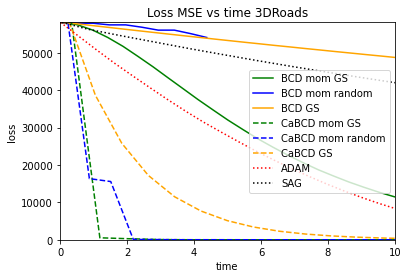

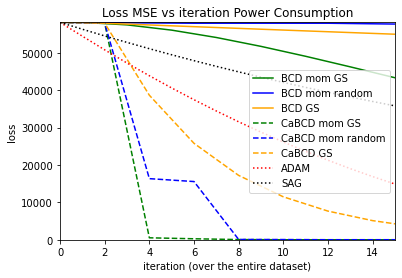

In [20]:
from matplotlib import pyplot as plt

plt.plot(t_momBCD_GS, loss_momBCD_GS, label="BCD mom GS", color='green')
plt.plot(t_randomBCD_GS, loss_randomBCD_GS, label="BCD mom random", color='blue')
plt.plot(t_BCD_GS, loss_BCD_GS, label="BCD GS", color='orange')
plt.plot(t_momCA_GS, loss_momCA_GS, label="CaBCD mom GS", linestyle='--', color='green')
plt.plot(t_momCA_random, loss_momCA_random, label="CaBCD mom random", linestyle='--', color='blue')
plt.plot(t_CABCD_stand_GS, loss_CABCD_stand_GS, label="CaBCD GS", linestyle='--', color='orange')
plt.plot(t_ADAM, loss_ADAM, label="ADAM", linestyle=':', color='red')
plt.plot(t_SAG, loss_SAG, label="SAG", linestyle=':', color='black')
plt.legend(loc = "right")
plt.title('Loss MSE vs time 3DRoads')
plt.xlabel('time')
plt.ylabel('loss')

plt.xlim([0,10])
plt.ylim([0,max(loss_momCA_GS)])
# plt.savefig('CaBCD_vs_all_time_Elec.pdf', bbox_inches='tight')
plt.show()

plt.plot(iteration_momBCD_GS, loss_momBCD_GS, label="BCD mom GS", color='green')
plt.plot(iteration_randomBCD_GS, loss_randomBCD_GS, label="BCD mom random", color='blue')
plt.plot(iteration_BCD_GS, loss_BCD_GS, label="BCD GS", color='orange')
plt.plot(iteration_momCA_GS, loss_momCA_GS, label="CaBCD mom GS", linestyle='--', color='green')
plt.plot(iteration_momCA_random, loss_momCA_random, label="CaBCD mom random", linestyle='--', color='blue')
plt.plot(iteration_CABCD_stand_GS, loss_CABCD_stand_GS, label="CaBCD GS", linestyle='--', color='orange')
plt.plot(iteration_ADAM, loss_ADAM, label="ADAM", linestyle=':', color='red')
plt.plot(iteration_SAG, loss_SAG, label="SAG", linestyle=':', color='black')
plt.legend(loc = "right")
plt.title('Loss MSE vs iteration Power Consumption')
plt.xlabel('iteration (over the entire dataset)')
plt.ylabel('loss')
plt.xlim([0,15])
plt.ylim([0,max(loss_momCA_GS)])
# plt.savefig('CaBCD_vs_all_iteration_Elec.pdf', bbox_inches='tight')
plt.show()